Fist, lets import all the required libraries, which are:

*   numpy
*   pandas
*   matplotlib.pyplot
*   StandardScaler
*   train_test_split
*   LinearRegression
*   mean_squared_error



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Lets read the csv file and store it into a dataframe. We will use the path of the multiple linear regression file to do this.

In [5]:
df = pd.read_csv('/content/Student_Performance multiple linear regression.csv')

Run the cell below to set new input and target values. Notice that our input data is now a 2-dimensional array, or a matrix.

In [6]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Run the cell below to visualise our data

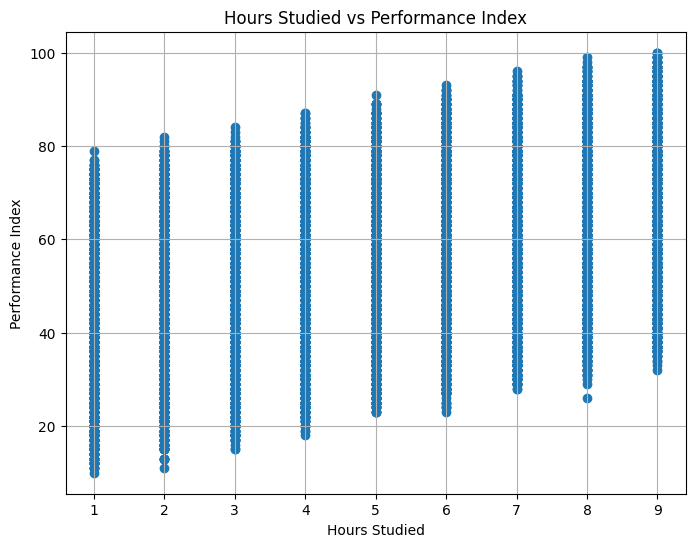

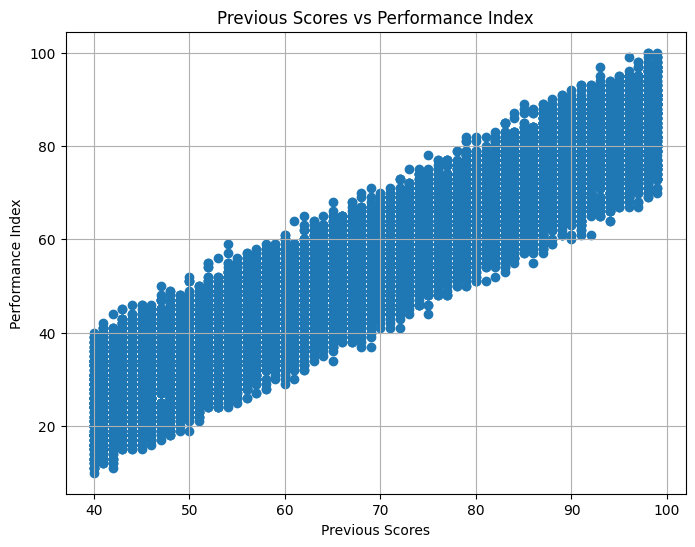

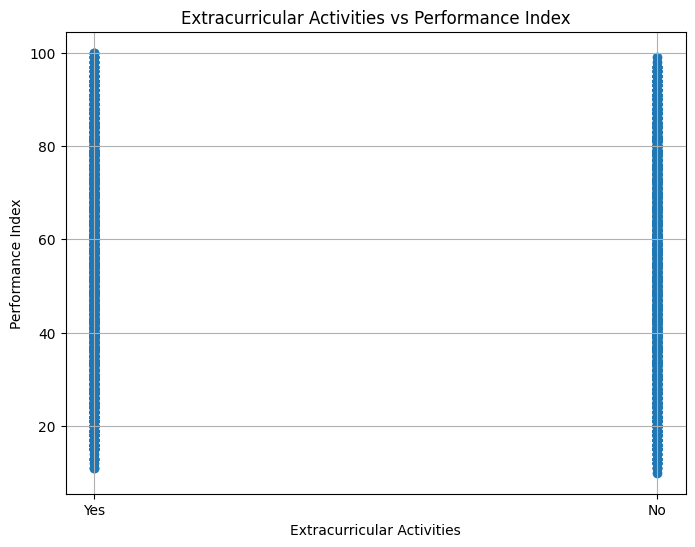

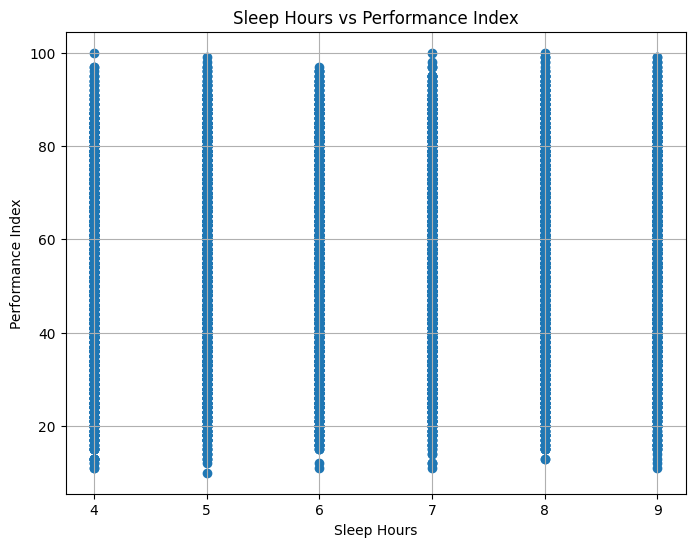

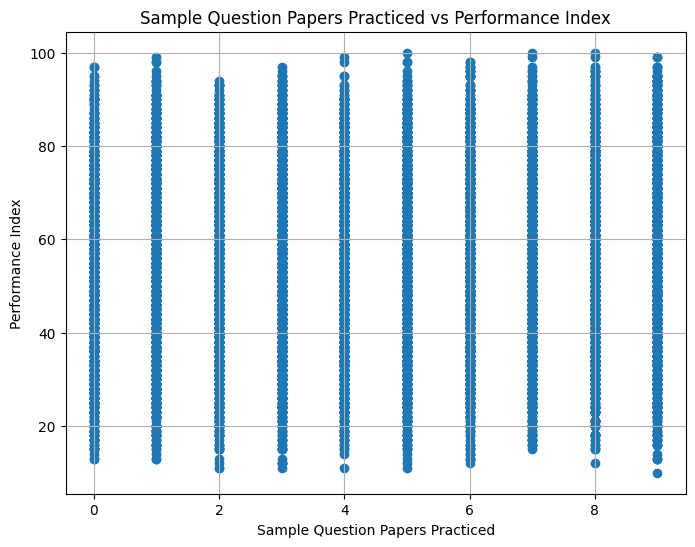

In [7]:
columns_to_plot = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['Performance Index'])
    plt.xlabel(column)
    plt.ylabel('Performance Index')
    plt.title(f'{column} vs Performance Index')
    plt.grid(True)
    plt.show()
plt.show()

Lets understand our data a little more by using the '.describe()' method

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Now, lets set our input data as 'X'.
We will set X as every column except the performance index column. We will do this by dropping only the performance index column.

Lets set our target data as 'y'.
We will set y as the Performance Index column.

In [10]:
X = df.drop(['Performance Index'], axis = 1)
y = df['Performance Index']

Visualise the data by printing both X and y

In [11]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [12]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

Now, we see that the extracurricular activities column isn't numerically represented. In order to do so, we will implement one-hot encoding, converting yes to 1 and no to 0 so that our model can actually understand the data.

We will make use of the '.replace()' method

In [13]:
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes':1, 'No':0})

Lets visualise the changes

In [14]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


Now, we will perform standard scaling on our input dataset X. We will follow the same procedure as single linear regression.

1. Store columns of X in a variable 'columns' by using the '.columns' method. We do this because using standard scaler converts our dataframe into a numpy array and in order to convert it back to a dataframe, we require the column names.



In [15]:
columnsX = X.columns

Lets print the columns

In [16]:
columnsX

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

2. Lets create an instance of StandardScaler


In [17]:
scaler = StandardScaler()


3. Now, we will use the 'fit_transform()' method of standard scaler in order to do 2 things:
  -  Find the standard deviation for our input data (fit)
  -   Normalize our input data (transform)

In [18]:
X = scaler.fit_transform(X)

4. Lets convert our normalized data to a dataframe again

In [20]:
X = pd.DataFrame(X, columns = columnsX)

Lets print X to see the normalized data

In [21]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.010455,1.456205,-1.249754
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982
2,1.161410,-1.063626,1.010455,0.276805,-0.900982
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982
4,0.775188,0.320275,-0.989654,0.866505,0.145333
...,...,...,...,...,...
9995,-1.542149,-1.178951,1.010455,-1.492294,-0.900982
9996,0.775188,-0.314013,1.010455,0.866505,0.145333
9997,0.388965,0.781575,1.010455,0.866505,0.145333
9998,1.547633,1.588851,1.010455,0.276805,-1.598526


Now, we will use the 'train_test_split()' method in order to split our data into training and test data. We will store this in 4 variables: train_X, test_X, train_y, test_y. We will split our data as 80% training data, 20% testing data.

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, shuffle = False, stratify = None)

Lets create an instance of LinearRegression

In [24]:
lr = LinearRegression()

Lets train the linear regression model on our training data using the '.fit()' method

In [25]:
lr.fit(train_X, train_y)

LinearRegression()

Lets make predictions on the training data and store it in the variable 'train_predictions'

In [26]:
train_predictions = lr.predict(train_X)

Lets make predictions on the testing data and store it in the variable 'test_predictions'

In [27]:
test_predictions = lr.predict(test_X)

Now, we will use the 'mean_squared_error()' method to find the mean squared error for our predictions on the **training** data. We will do this by comparing with the target values of training data.

In [28]:
train_mse = mean_squared_error(train_y, train_predictions)

Print the training mse

In [29]:
train_mse

4.128054592985787

Now, we will use the same method to find the mean squared error for our predictions on the **testing** data. We will do this by comparing with the target values of testing data.

In [31]:
test_mse = mean_squared_error(test_y, test_predictions)

Print the testing mse

In [32]:
test_mse

4.247182985000945

Great work! Lets visualise our predictions. Run the cells below.

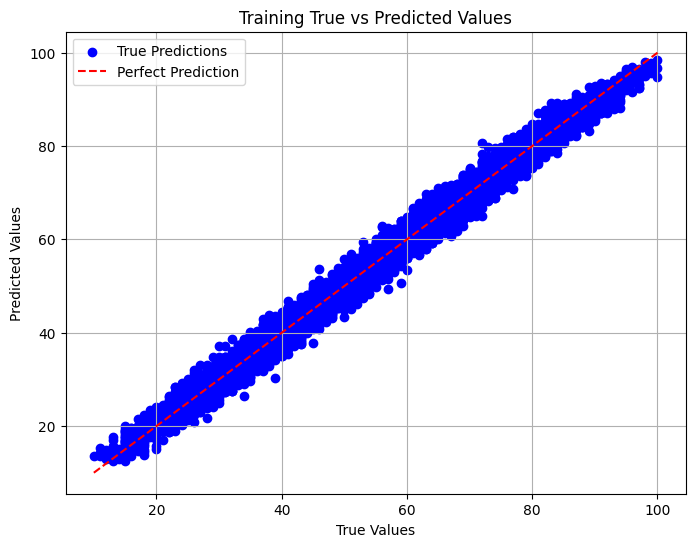

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(train_y, train_predictions, c='blue', label='True Predictions')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

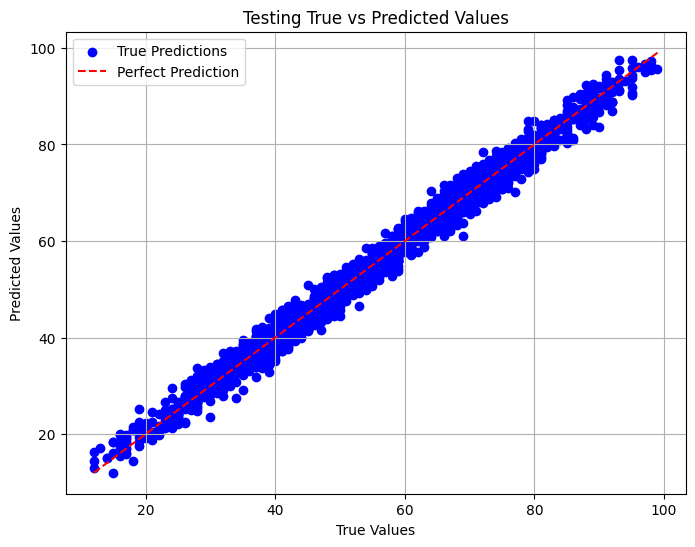

In [37]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_y, test_predictions, c='blue', label='True Predictions')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Testing True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Now, lets use the '.predict()' method of LinearRegression to make a prediction on our first training example (at index 0). We can access a training example in a dataframe using '.iloc[]'

In [38]:
lr.predict(train_X.iloc[[0]])

array([91.82451556])

Lets see what the true target value of our first training example.

In [40]:
train_y.iloc[[0]]

0    91.0
Name: Performance Index, dtype: float64

# Congratulations on completing the workshop! You have successfully implemented Multiple linear regression.
As we can see, multiple linear regression provides much more accurate predictions and better performance